importing data using pandas

In [3]:
import pandas as pd
import numpy as np

In [4]:
fish_data = pd.read_csv(r'C:\Users\BSK\Desktop\python\Fish.csv')

Data overview

In [3]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


checking for null values

In [4]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

classifying the target and other features

In [5]:
fish_data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

visualizing the data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Weight')

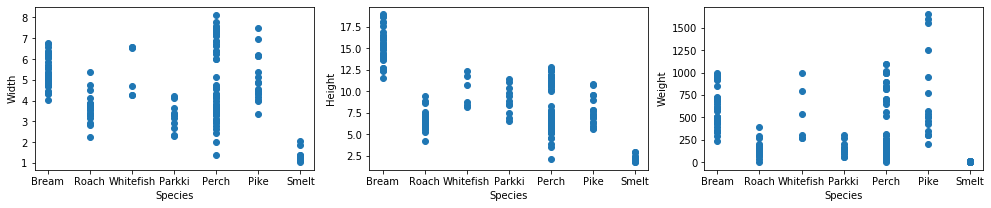

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(17,3))
axes[0].scatter('Species','Width',data=fish_data)
axes[1].scatter('Species','Height',data=fish_data)
axes[2].scatter('Species','Weight',data=fish_data)
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Width')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Height')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('Weight')


In [8]:
label = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

finding min and max values of data based on species

In [38]:
for n in label:
    print(fish_data[fish_data['Species']== n].min())

Species    Bream
Weight       242
Length1     23.2
Length2     25.4
Length3       30
Height     11.52
Width       4.02
dtype: object
Species     Roach
Weight          0
Length1      12.9
Length2      14.1
Length3      16.2
Height     4.1472
Width       2.268
dtype: object
Species    Whitefish
Weight           270
Length1         23.6
Length2           26
Length3         28.7
Height        8.1454
Width         4.2476
dtype: object
Species    Parkki
Weight         55
Length1      13.5
Length2      14.7
Length3      16.5
Height     6.5772
Width      2.3142
dtype: object
Species    Perch
Weight       5.9
Length1      7.5
Length2      8.4
Length3      8.8
Height     2.112
Width      1.408
dtype: object
Species      Pike
Weight        200
Length1        30
Length2      32.3
Length3      34.8
Height      5.568
Width      3.3756
dtype: object
Species     Smelt
Weight        6.7
Length1       9.3
Length2       9.8
Length3      10.8
Height     1.7284
Width      1.0476
dtype: object


In [37]:
for n in label:
    print(fish_data[fish_data['Species']== n].max())

Species     Bream
Weight       1000
Length1        38
Length2        41
Length3      46.5
Height     18.957
Width      6.7497
dtype: object
Species    Roach
Weight       390
Length1     29.5
Length2     31.7
Length3       35
Height     9.485
Width      5.355
dtype: object
Species    Whitefish
Weight          1000
Length1         37.3
Length2           40
Length3         43.5
Height        12.354
Width         6.5736
dtype: object
Species    Parkki
Weight        300
Length1        24
Length2        26
Length3        29
Height     11.368
Width       4.234
dtype: object
Species      Perch
Weight        1100
Length1       41.1
Length2         44
Length3       46.6
Height     12.8002
Width        8.142
dtype: object
Species      Pike
Weight       1650
Length1        59
Length2      63.4
Length3        68
Height     10.812
Width        7.48
dtype: object
Species     Smelt
Weight       19.9
Length1      13.8
Length2        15
Length3      16.2
Height     2.9322
Width      2.0672
dtype: object

In [29]:
grouped_data = fish_data.groupby('Species')

Text(0, 0.5, 'Length3')

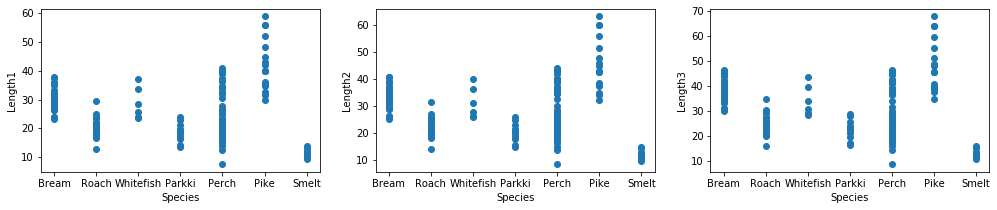

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(17,3))
axes[0].scatter('Species','Length1',data=fish_data)
axes[1].scatter('Species','Length2',data=fish_data)
axes[2].scatter('Species','Length3',data=fish_data)
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Length1')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Length2')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('Length3')


In [67]:
fish_data.groupby(fish_data['Species']).max()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,1000.0,38.0,41.0,46.5,18.9570,6.7497
Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
Perch,1100.0,41.1,44.0,46.6,12.8002,8.1420
Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
Roach,390.0,29.5,31.7,35.0,9.4850,5.3550
Smelt,19.9,13.8,15.0,16.2,2.9322,2.0672
Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5736


removing the outlier (the below method is not recommended for all outliers based on data the outlier should be handled )

In [10]:
fish_data.drop(fish_data[fish_data['Species']=='Whitefish']['Width'].idxmax(),inplace=True)

In [60]:
columns =['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [15]:
x = fish_data.drop('Species',axis=1)
y = fish_data['Species']

splitting the data  

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


using logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\BSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

predictions of y_test

In [18]:
logpredictions = logmodel.predict(X_test)

classification report

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

       Bream       0.88      1.00      0.93        14
      Parkki       0.00      0.00      0.00         3
       Perch       0.63      0.94      0.76        18
        Pike       1.00      0.20      0.33         5
       Roach       0.33      0.25      0.29         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.74        53
   macro avg       0.55      0.48      0.47        53
weighted avg       0.68      0.74      0.67        53



C:\Users\BSK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy with logistic regression is 74

tuning of logistic regression
  

what are the ways to tune the model:
       

        1 -> based on the target feature like classification of 2 or more type
       

                if it is more than two predictions try to implement one vs rest method

      2 -> by changing other parameters manually or by using gridsearch,randomizedsearchcv

logistic regression using ovr(one vs rest method)

In [17]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(multi_class='ovr')
logmodel.fit(X_train,y_train)

C:\Users\BSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\BSK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logpredictions = logmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
logmodel.predict_proba(X_test)

array([[1.06105087e-03, 6.20174234e-09, 4.46994158e-03, 6.53088498e-01,
        3.33334839e-01, 2.33497790e-09, 8.04566239e-03],
       [3.56559946e-03, 9.00424080e-03, 1.39586784e-01, 3.19427977e-05,
        8.14856421e-01, 7.58584323e-07, 3.29542533e-02],
       [1.37314353e-03, 2.65271301e-11, 4.87697459e-02, 9.39755639e-01,
        4.65503076e-03, 6.42680992e-16, 5.44644120e-03],
       [4.76972096e-07, 1.24255557e-02, 4.23261274e-01, 1.61253468e-08,
        1.33127148e-01, 4.22167879e-01, 9.01764982e-03],
       [1.66890638e-04, 3.29697679e-03, 7.31052754e-01, 4.01748219e-05,
        2.49322924e-01, 2.85320654e-05, 1.60917471e-02],
       [9.29383218e-01, 5.38085608e-04, 5.36907524e-04, 2.07911942e-08,
        3.78339750e-06, 2.71481599e-42, 6.95379846e-02],
       [3.70439943e-04, 2.86489271e-03, 7.64983697e-01, 1.82959070e-04,
        2.17573023e-01, 6.57415844e-06, 1.40184139e-02],
       [4.00124594e-04, 1.20861330e-03, 8.68243367e-01, 3.69253071e-04,
        1.15191592e-01, 7

In [21]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        12
      Parkki       1.00      1.00      1.00         4
       Perch       0.89      1.00      0.94        17
        Pike       1.00      1.00      1.00         8
       Roach       0.80      1.00      0.89         4
       Smelt       1.00      0.83      0.91         6
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        53
   macro avg       0.81      0.83      0.82        53
weighted avg       0.91      0.94      0.93        53



C:\Users\BSK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we get an accuracy of 94 percent